# Assignment 2
Students:
- Hai Ly - 110137495
- Kitty Duong - 110139051
- Tasmia Islam - 110058801

First we install the libraries used for this assigment

In [1]:
%pip install numpy matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Question 1

Download the benchmark dataset, MNIST, from http://yann.lecun.com/exdb/mnist/. Implement multi-class classification for recognizing handwritten digits (also known as multiclass logistic regression ---this is simply a feedforward neural network with k output neurons, with one output neuron for each class, and each output neuron oi returns the probability that the input data-point xj is in class i) and try it on MNIST. 

Comments: No need to implement almost anything in DL by your own (this is true in general); the software framework (ie, the DL platform) typically provides implementations for all the things discussed in class, such as the learning algorithms, the regularizations methods, the cross-validation methods, etc.

Use your favorite deep learning platform. A few candidates:

1.	Marvin from http://marvin.is/ 
2.	Caffe from http://caffe.berkeleyvision.org) 
3.	TensorFlow from https://www.tensorflow.org
4.	Pylearn2 from http://deeplearning.net/software/pylearn2/
5.	Theano, Torch, Lasagne, etc. See more platforms at http://deeplearning.net/software_links/.

Read the tutorial about your selected platform (eg, for TensorFlow: https://www.tensorflow.org/tutorials), try it on MNIST; note that the first few examples in the tutorials are typically on MNIST or other simple image datasets, so you can follow the steps. 

Comments: MNIST is a standard dataset for machine learning and also deep learning. It’s good to try it on one shallow neural network (with one output neuron; eg, for recognizing a character A from a not-A character) before trying it on a deep neural network with multiple outputs. Downloading the dataset from other places in preprocessed format is allowed, but practicing how to read the dataset prepares you for other new datasets you may be interested in (thus, please, read the MNIST website carefully). 

1.	Try the basic minibatch SGD as your learning algorithm. It is recommended to try different initializations, different batch sizes, and different learning rates, in order to get a sense about how to tune the hyperparameters (batch size, and, learning rate). Remember to create and use validation dataset!. it will be very useful for you to read Chapter-11 of the textbook.

2.	It is recommended to try, at least, another optimization method of your choice (SGD with momentum, RMSProp, RMSProp with momentum, AdaGrad, AdaDelta, or Adam) and compare its performances to those of the basic minibatch SGD on the MNIST dataset. Which methods you want to try and how many you want to try and compare is up to you and up to the amount of time you have left to complete the assignment. Remember, this is a research course. You may want to read Chapter-8 also.

For this question we experimented with the following approaches:

1. Minibatch SGD with momentum, batch size = 20.
2. Minibatch SGD with momentum, batch size = 100.
2. Adam optimimizer, batch size = 20 
2. Adam optimimizer, batch size = 100 

We use Tensorflow for loading dataset and building the model. When fitting the model, the `validation_split` parameter is set to 0.2 and `epoch` = 10. 


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

2024-06-24 14:10:09.872010: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 14:10:09.872060: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 14:10:09.873465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data preperation and Model building

We first load the MNIST dataset, `x_train` will be used for training the model. We report the performance on `x_test`

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu, name='L1'),
            tf.keras.layers.Dense(64, activation=tf.nn.relu, name='L2'),
            tf.keras.layers.Dense(32, activation=tf.nn.relu, name='L3'),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='L4')
        ])

## Mini batch SGD algorithm Momentum (batch size = 20)

In [5]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=sgd, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10


I0000 00:00:1719238216.259889    1908 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2400/2400 [==============================] - 9s 3ms/step - loss: 0.3444 - accuracy: 0.8951 - val_loss: 0.1810 - val_accuracy: 0.9463
Epoch 2/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1348 - accuracy: 0.9577 - val_loss: 0.1338 - val_accuracy: 0.9606
Epoch 3/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0964 - accuracy: 0.9694 - val_loss: 0.1086 - val_accuracy: 0.9685
Epoch 4/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0703 - accuracy: 0.9787 - val_loss: 0.1016 - val_accuracy: 0.9714
Epoch 5/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0575 - accuracy: 0.9815 - val_loss: 0.1028 - val_accuracy: 0.9697
Epoch 6/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.1170 - val_accuracy: 0.9690
Epoch 7/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.1128 - val_accuracy: 0.9716
Epo

In [6]:
eval_loss1, eval_acc1 = model.evaluate(x_test, y_test)

print('Test accuracy: ', eval_acc1)
print('Test loss: ', eval_loss1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1168 - accuracy: 0.9706
Test accuracy:  0.9706000089645386
Test loss:  0.11682916432619095


In [7]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.95      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.96      0.99      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Minibatch SGD algorithm with momentum (batch size = 100)

In [8]:
tf.keras.backend.clear_session()
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu, name='L1'),
            tf.keras.layers.Dense(64, activation=tf.nn.relu, name='L2'),
            tf.keras.layers.Dense(32, activation=tf.nn.relu, name='L3'),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='L4')

    ])
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=sgd, metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 2s 4ms/step - loss: 0.8032 - accuracy: 0.7612 - val_loss: 0.2962 - val_accuracy: 0.9162
Epoch 2/10
480/480 [==============================] - 2s 3ms/step - loss: 0.2628 - accuracy: 0.9237 - val_loss: 0.2106 - val_accuracy: 0.9367
Epoch 3/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1939 - accuracy: 0.9424 - val_loss: 0.1819 - val_accuracy: 0.9456
Epoch 4/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1527 - accuracy: 0.9541 - val_loss: 0.1483 - val_accuracy: 0.9563
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1234 - accuracy: 0.9628 - val_loss: 0.1314 - val_accuracy: 0.9588
Epoch 6/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.9684 - val_loss: 0.1279 - val_accuracy: 0.9608
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.0872 - accuracy: 0.9737 - val_loss: 0.1234 - val_accuracy: 0.9620
Epoch 

In [9]:
eval_loss2, eval_acc2 = model2.evaluate(x_test, y_test)

print('Test accuracy: ', eval_acc2)
print('Test loss: ', eval_loss2)

313/313 [==============================] - 1s 2ms/step - loss: 0.1075 - accuracy: 0.9666
Test accuracy:  0.9666000008583069
Test loss:  0.10747282952070236


In [10]:
y_pred = np.argmax(model2.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.99      0.94      0.96       892
           6       0.98      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.91      0.97      0.94       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Adam optimizer (batch size = 20)

In [11]:
tf.keras.backend.clear_session()

model3 = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu, name='L1'),
            tf.keras.layers.Dense(64, activation=tf.nn.relu, name='L2'),
            tf.keras.layers.Dense(32, activation=tf.nn.relu, name='L3'),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='L4')
    ])

model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
model3.fit(x_train, y_train, batch_size=20, epochs=10, validation_split=0.2)

Epoch 1/10
2400/2400 [==============================] - 9s 3ms/step - loss: 0.3014 - accuracy: 0.9104 - val_loss: 0.1520 - val_accuracy: 0.9529
Epoch 2/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1216 - accuracy: 0.9619 - val_loss: 0.1148 - val_accuracy: 0.9652
Epoch 3/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0831 - accuracy: 0.9736 - val_loss: 0.1118 - val_accuracy: 0.9665
Epoch 4/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.0911 - val_accuracy: 0.9732
Epoch 5/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0471 - accuracy: 0.9845 - val_loss: 0.1083 - val_accuracy: 0.9703
Epoch 6/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0398 - accuracy: 0.9867 - val_loss: 0.1116 - val_accuracy: 0.9684
Epoch 7/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.1098 - val_accuracy:

In [12]:
eval_loss3, eval_acc3 = model3.evaluate(x_test, y_test)

print('Test accuracy: ', eval_acc3)
print('Test loss: ', eval_loss3)

313/313 [==============================] - 1s 2ms/step - loss: 0.1208 - accuracy: 0.9721
Test accuracy:  0.972100019454956
Test loss:  0.12075956165790558


In [13]:
y_pred = np.argmax(model3.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.93      0.98      0.95       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Adam optimizer (batch size = 100)

In [14]:
tf.keras.backend.clear_session()

model4 = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu, name='L1'),
            tf.keras.layers.Dense(64, activation=tf.nn.relu, name='L2'),
            tf.keras.layers.Dense(32, activation=tf.nn.relu, name='L3'),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='L4')
    ])

model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
model4.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 3s 4ms/step - loss: 0.4113 - accuracy: 0.8800 - val_loss: 0.1946 - val_accuracy: 0.9423
Epoch 2/10
480/480 [==============================] - 2s 3ms/step - loss: 0.1573 - accuracy: 0.9533 - val_loss: 0.1507 - val_accuracy: 0.9552
Epoch 3/10
480/480 [==============================] - 2s 3ms/step - loss: 0.1082 - accuracy: 0.9674 - val_loss: 0.1186 - val_accuracy: 0.9639
Epoch 4/10
480/480 [==============================] - 2s 3ms/step - loss: 0.0805 - accuracy: 0.9753 - val_loss: 0.1086 - val_accuracy: 0.9680
Epoch 5/10
480/480 [==============================] - 2s 3ms/step - loss: 0.0628 - accuracy: 0.9811 - val_loss: 0.1022 - val_accuracy: 0.9707
Epoch 6/10
480/480 [==============================] - 2s 3ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.1141 - val_accuracy: 0.9668
Epoch 7/10
480/480 [==============================] - 2s 3ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.1102 - val_accuracy: 0.9697
Epoch 

In [15]:
eval_loss4, eval_acc4 = model4.evaluate(x_test, y_test)

print('Test accuracy: ', eval_acc4)
print('Test loss: ', eval_loss4)

313/313 [==============================] - 1s 2ms/step - loss: 0.1133 - accuracy: 0.9713
Test accuracy:  0.9713000059127808
Test loss:  0.11332608759403229


In [16]:
y_pred = np.argmax(model4.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Question 2:
Consider the L2-regularized multiclass logistic regression. That is, add to the logistic regression loss a regularization term that represents the L2-norm of the parameters. More precisely, the regularization term is 

$$ (w, b) = \lambda \sigma_i (||w^i||^2 + ||b^i||^2) $$

where ${w^i, b^i}$ are all the parameters in the logistic regression, and $\lambda \in R$ is the regularization hyper-parameter. Typically, $\lambda$ is about C/n where n is the number of data points and C is some constant in `[0.01,100]` (need to tune C). Run the regularized multiclass logistic regression on MNIST, using the basic minibatch SGD, and compare its results to those of the basic minibatch SGD with non-regularized loss, in Question #1.

## Import packages and load MNIST dataset

In [17]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


## Normalize the data and define a function to return a feedforward neural network model

We also applied momentum optimizer and batch size = 20.

In [18]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Clear any previous models from memory
tf.keras.backend.clear_session()

## Run the regularized multiclass logistic regression using the basic minibatch SGD

Tuning C: We use a validation split during training to evaluate performance on a portion of training data (20%). The best parameter C will be the one with the best validation performance. 

In [19]:
n = x_train.shape[0]

C_values = [0.01, 0.1, 1, 10, 100]

best_validation_acc = 0
best_C = None

for C in C_values:
    lambda_reg = C / n
    regularizer = tf.keras.regularizers.L2(lambda_reg)
    sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=20, verbose=0, validation_split=0.2)
    val_acc = history.history['val_accuracy'][-1]  # take the last epoch's validation accuracy
    # Track the best performing C
    if val_acc > best_validation_acc:
        best_validation_acc = val_acc
        best_C = C


print(f"Best performing C based on validation accuracy: {best_C} with validation accuracy: {best_validation_acc}")

Best performing C based on validation accuracy: 10 with validation accuracy: 0.9731666445732117


## Compare results to those of the basic minibatch SGD with non-regularized loss, in Question #1.

- With the selected the best C, we retrained the model using all of the training data (without validation split). Finally, evaluate the model's performance on the independent test set.
- Note that we used the same setting with batch_size = 20, SGD with momentum with the first approach in Question 1.


In [20]:

# Now, retrain the model with the best C on the entire training set
n = x_train.shape[0]
lambda_reg = best_C / n
regularizer = tf.keras.regularizers.L2(lambda_reg)

best_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dense(10, activation='softmax')
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
best_model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

best_model.fit(x_train, y_train, epochs=10, batch_size=20, validation_split=0.2)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(x_test, y_test)

print(f"Best model - Test accuracy: {test_acc}, Test loss: {test_loss}")

Epoch 1/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4314 - accuracy: 0.8874 - val_loss: 0.2462 - val_accuracy: 0.9482
Epoch 2/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.2123 - accuracy: 0.9569 - val_loss: 0.2246 - val_accuracy: 0.9512
Epoch 3/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1722 - accuracy: 0.9685 - val_loss: 0.1986 - val_accuracy: 0.9613
Epoch 4/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1489 - accuracy: 0.9749 - val_loss: 0.1843 - val_accuracy: 0.9657
Epoch 5/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1356 - accuracy: 0.9790 - val_loss: 0.1743 - val_accuracy: 0.9693
Epoch 6/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1232 - accuracy: 0.9825 - val_loss: 0.1649 - val_accuracy: 0.9707
Epoch 7/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.1147 - accuracy: 0.9847 - val_loss: 0.1611 - val_accuracy:

In [21]:
y_pred = np.argmax(best_model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       1.00      0.96      0.97      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.95      0.97      1010
           4       0.99      0.95      0.97       982
           5       0.94      0.99      0.96       892
           6       0.95      0.99      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.93      0.98      0.95       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Question 3: 
Try CNN (convolutional neural networks) on MNIST (or CIFAR or any dataset of your choice). Use the basic minibatch SGD as your learning algorithm, with and without regularizations (and compare them). Experiment with different regularization methods (dropout, L2-norm, augmentation, early stopping, etc). You may need to read Chapter-7, Chapter-8 and Chapter-9.

## Load the CIFAR dataset
We first install `tensorflow` and import the packages that will be used for this question. We selected CIFAR10 dataset,  with 60000 images of 10 classes (airplane, automobile, bird, cat deer, dog, frog, horse, ship, truck)

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

Here we showed the size of train data, test data. Each image has `32x32` pixels and 3 color channels. We also displayed and some images from the dataset. Before applying training CNN, we normalize the pixel values of the image between 0 and 1.

170498071/170498071 [==============================] - 3s 0us/step
Train dataset: (50000, 32, 32, 3)
Test dataset: (10000, 32, 32, 3)


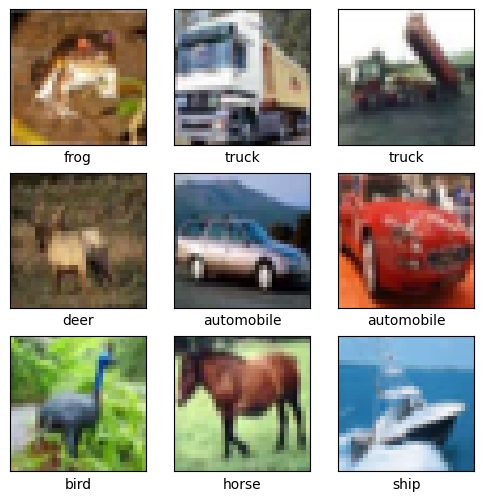

In [23]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Train dataset: {x_train.shape}")
print(f"Test dataset: {x_test.shape}")
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

epochs = 100

# Some sample images
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


## CNN model without any regularization

- We followed the architecture with:
    - 3 convolutional layers with max-pooling layers. The convolution layers has the same kernel size (3x3), stride (1, 1 - the default value), and apply 'same' padding (zero padding applied). However, the number of filters are different (32, 64, 128)
    - A flatten layer and 3 fully connected layers. 
    - For the layers, the activation used is Relu, except for the last output layer in which we used Softmax activation.
- For trainning this model, we use basic minibatch SGD with the batch size of 64. 20% of the train data will be used for validation. We trained the model using **100 epochs**.
- Finally, the test accuracy is reported on the test data.

In [24]:
model_1 = models.Sequential([
    # Convolution layers
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Fully connected with dropout
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    # Output
    layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 6s 6ms/step - loss: 2.2304 - accuracy: 0.1802 - val_loss: 2.0705 - val_accuracy: 0.2340
Epoch 2/100
625/625 [==============================] - 3s 4ms/step - loss: 1.9717 - accuracy: 0.2902 - val_loss: 1.9316 - val_accuracy: 0.2977
Epoch 3/100
625/625 [==============================] - 3s 4ms/step - loss: 1.7974 - accuracy: 0.3560 - val_loss: 1.7003 - val_accuracy: 0.3900
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6484 - accuracy: 0.4083 - val_loss: 1.6047 - val_accuracy: 0.4218
Epoch 5/100
625/625 [==============================] - 3s 4ms/step - loss: 1.5386 - accuracy: 0.4461 - val_loss: 1.5854 - val_accuracy: 0.4413
Epoch 6/100
625/625 [==============================] - 3s 4ms/step - loss: 1.4692 - accuracy: 0.4715 - val_loss: 1.4255 - val_accuracy: 0.4954
Epoch 7/100
625/625 [==============================] - 3s 4ms/step - loss: 1.4125 - accuracy: 0.4939 - val_loss: 1.3923 - val_accuracy: 0.5046

In [25]:
test_loss, test_acc = model_1.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.7336 - accuracy: 0.6955
Test loss: 2.7335824966430664
Test accuracy: 0.6955000162124634


## Early Stopping and Dropout
We use the same CNN architecture with 
- Additional 2 dropout layers with probability of 10% 
- Apply early stopping for training with patience = 3. After 3 epochs, if the validation loss cannot be improved, the training process stops early.

We observed that the accuracy on test dataset is higher than the CNN without any regularization, however the improvement can vary each run. As we can see, the training stopped earlier than 100 epochs which saves a lot of trainning time compared to the one without regularization

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [27]:
model_2 = models.Sequential([
    # Convolution layers
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # Fully connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
625/625 [==============================] - 6s 6ms/step - loss: 2.2413 - accuracy: 0.1758 - val_loss: 2.0587 - val_accuracy: 0.2782
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.9997 - accuracy: 0.2716 - val_loss: 1.9501 - val_accuracy: 0.3035
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.8068 - accuracy: 0.3490 - val_loss: 1.6393 - val_accuracy: 0.4188
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6510 - accuracy: 0.4036 - val_loss: 1.6015 - val_accuracy: 0.4252
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5613 - accuracy: 0.4347 - val_loss: 1.5755 - val_accuracy: 0.4414
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5000 - accuracy: 0.4564 - val_loss: 1.4053 - val_accuracy: 0.4965
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4432 - accuracy: 0.4754 - val_loss: 1.3683 - val_accuracy: 0.5023

In [28]:
# Evaluate the model
test_loss, test_acc = model_2.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8877 - accuracy: 0.7004
Test loss: 0.8876656293869019
Test accuracy: 0.7003999948501587


## Dropout and Data augmentation
For the final experiment, we apply data augmentation using `RandomTranslation`, `RandomTranslation`, `RandomContrast` from `tensorflow` which involves:

- Randomly translate the image: -10%, 10% vertically and horizontally.
- Randomly rotate the image with the angle ranging from `[-10% * 2pi, 10% * 2pi]`.
- RandomContrast adjust the contrast of an image.

We also achieved higher accuracy on testset in our execution compared to CNN without any regularization. Tthe performance is higher than early stopping model in our excution.

As an example, we plot an augmented image and the original image

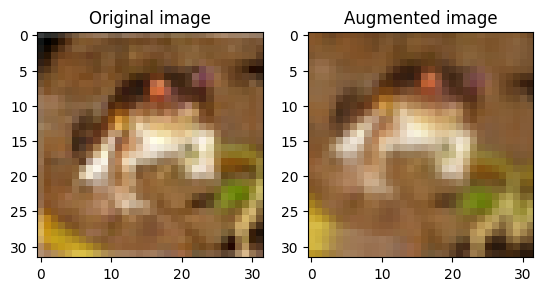

In [29]:
flip_and_rotation = models.Sequential([
    # Random augmentation.
    layers.RandomTranslation(height_factor=0.1,width_factor=0.1, seed=0), # shift -10%, 10% vertically and horizontally
    layers.RandomRotation(factor=0.1, seed=0), #rotate ([-10% * 2pi, 10% * 2pi])
    layers.RandomContrast(factor=0.1, seed=0),
])
augmented = flip_and_rotation(x_train[0])

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(x_train[0])

plt.subplot(1, 2, 2)
plt.title('Augmented image')
plt.imshow(augmented)

In [30]:
model_3 = models.Sequential([
    # Random augmentation.
    layers.RandomTranslation(height_factor=0.1,width_factor=0.1, seed=0),
    layers.RandomRotation(factor=0.1, seed=0),
    layers.RandomContrast(factor=0.1, seed=0),

    # Convolution layers
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Fully connected with dropout
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

model_3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_3.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 6s 6ms/step - loss: 2.2327 - accuracy: 0.1762 - val_loss: 2.0532 - val_accuracy: 0.2689
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 2.0445 - accuracy: 0.2502 - val_loss: 2.0157 - val_accuracy: 0.2543
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.9451 - accuracy: 0.2962 - val_loss: 1.8134 - val_accuracy: 0.3603
Epoch 4/100
625/625 [==============================] - 4s 6ms/step - loss: 1.8606 - accuracy: 0.3318 - val_loss: 1.7631 - val_accuracy: 0.3697
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7833 - accuracy: 0.3601 - val_loss: 1.6665 - val_accuracy: 0.4056
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7176 - accuracy: 0.3790 - val_loss: 1.6372 - val_accuracy: 0.4120
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6606 - accuracy: 0.3996 - val_loss: 1.5765 - val_accuracy: 0.4305

In [31]:
test_loss, test_acc = model_3.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.8421 - accuracy: 0.7188
Test loss: 0.8421086668968201
Test accuracy: 0.7188000082969666
